In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def plot_ims(filename, vmin=0, vmax=1, moments=[0.01, 0.02, 0.05, 0.1, 0.15, 5.01, 5.02, 5.05, 5.1, 5.15]):
    "Function for plotting the frames"
    # Read the simulation results
    calcium = pd.read_hdf("../../results/data/calcium/" + filename + ".h5")
    calcium = calcium.values.reshape(len(calcium), 60, 60)
    ca_ecto = calcium[:, :30, :]
    ca_ecto.shape

    dt = 0.001
    
    fig = plt.figure(figsize=(20,5))

    for j, moment in enumerate(moments):
        ax = fig.add_subplot(1, len(moments), j+1)
        index = int(moment / dt)
        im = np.flip(ca_ecto[index].T, 0)
        ax.imshow(im, cmap='hot', vmin=vmin, vmax=vmax)
        ax.set_title(str(moment) + 's')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
    return ca_ecto

# Parameters interpretations:

- **total_prop_time**: total time needed for the neuronal wave to propagate from the bottom to the top
- **v_delta**: rate of PLC-$\delta$
- **gc**: electrical coupling conductance of muscle (all set to 0 in below tests)
- **density**: innervation density
- **neighborsize**: each neuron can stimulate neighborsize x neighborsize muscle cells near it
- **gip3x**: gap junctional IP3 diffusion coefficient in x direction
- **gip3y**: gap junctional IP3 diffusion coefficient in y direction

# Test results

## total_prop_time=50ms, v_delta = 0.03

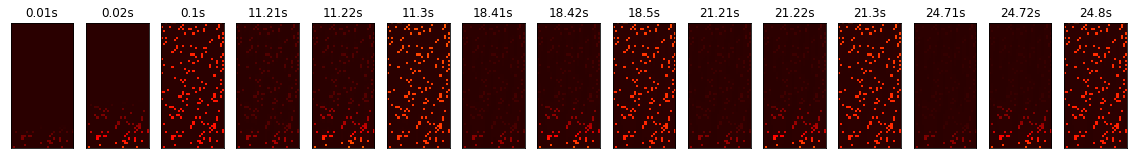

In [3]:
# gc = 0, density = 0.1, neighborsize = 1, gip3x = 0.1, gip3y = 2
plot_ims("2020-09-21-17-49-05-638584", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 18.41, 18.42, 18.5, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

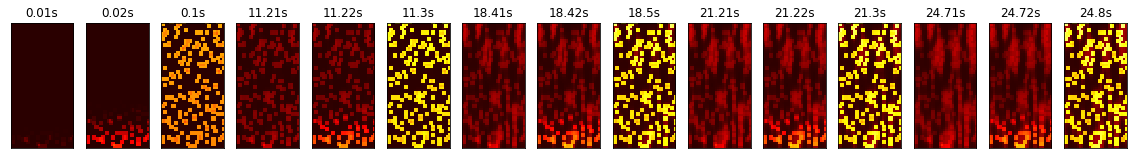

In [4]:
# gc = 0, density = 0.1, neighorsize = 2, gip3x = 0.1, gip3y = 2
plot_ims("2020-09-21-18-12-02-609703", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 18.41, 18.42, 18.5, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

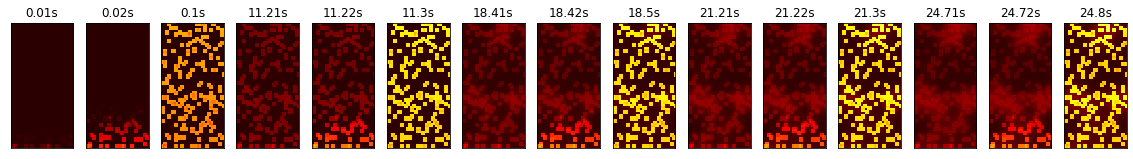

In [5]:
# gc = 0, density = 0.1, neighorsize = 2, gip3x = 2, gip3y = 2
plot_ims("2020-09-21-18-47-58-639189", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 18.41, 18.42, 18.5, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

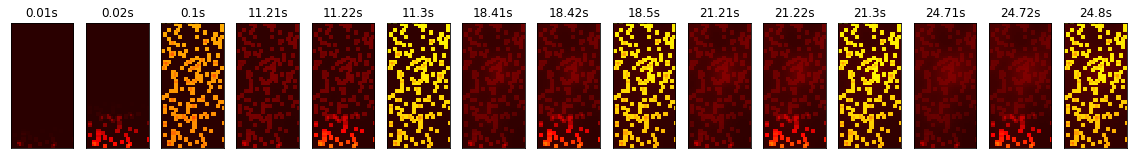

In [6]:
# gc = 0, density = 0.1, neighorsize = 2, gip3x = 5, gip3y = 5
plot_ims("2020-09-21-18-47-40-183187", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 18.41, 18.42, 18.5, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

## total_prop_time=50ms, v_delta = 0.06

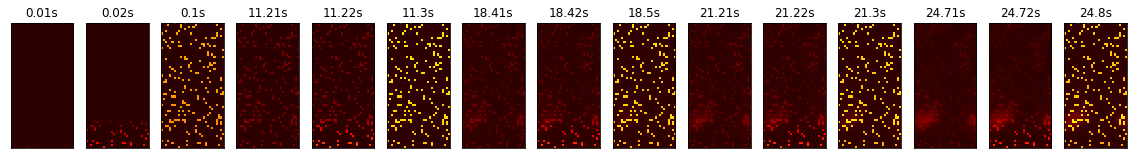

In [7]:
# gc = 0, density = 0.05, neighorsize = 1, gip3x = 2, gip3y = 2
plot_ims("2020-09-21-19-18-16-994930", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 18.41, 18.42, 18.5, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

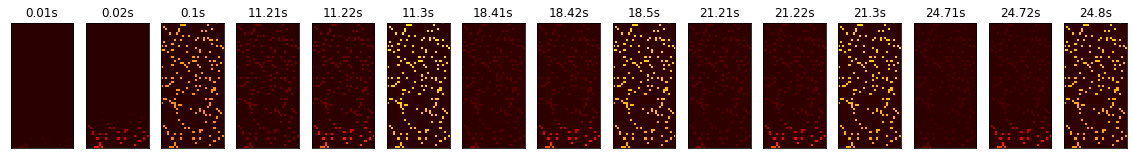

In [8]:
# gc = 0, density = 0.05, neighorsize = 1, gip3x = 5, gip3y = 5
plot_ims("2020-09-21-19-17-56-130956", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 18.41, 18.42, 18.5, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

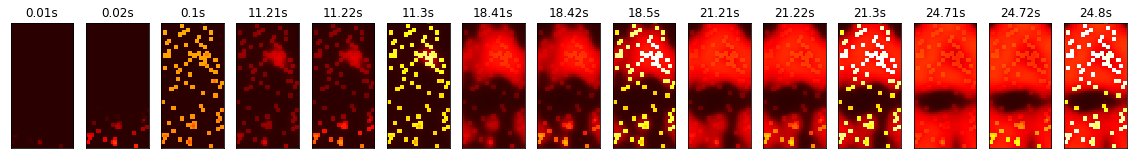

In [10]:
# gc = 0, density = 0.05, neighorsize = 2, gip3x = 2, gip3y = 2
ca1 = plot_ims("2020-09-21-18-31-49-761982", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 18.41, 18.42, 18.5, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

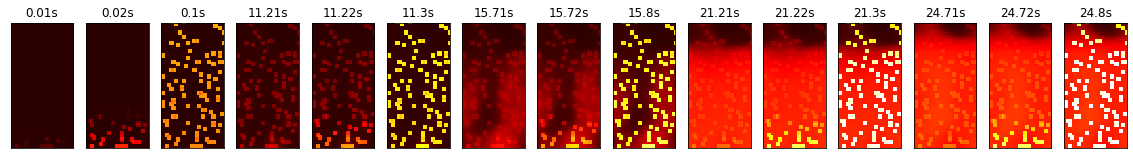

In [11]:
# gc = 0, density = 0.05, neighorsize = 2, gip3x = 5, gip3y = 5
ca2 = plot_ims("2020-09-21-18-32-00-756664", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 15.71, 15.72, 15.8, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

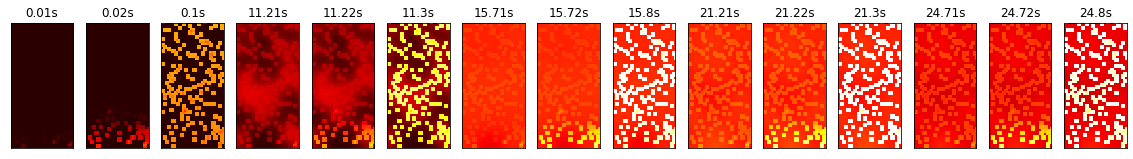

In [12]:
# gc = 0, density = 0.1, neighorsize = 2, gip3x = 5, gip3y = 5
ca3 = plot_ims("2020-09-21-18-33-45-297428", moments=[0.01, 0.02, 0.1, 11.21, 11.22, 11.3, 15.71, 15.72, 15.8, 21.21, 21.22, 21.3, 24.71, 24.72, 24.8])

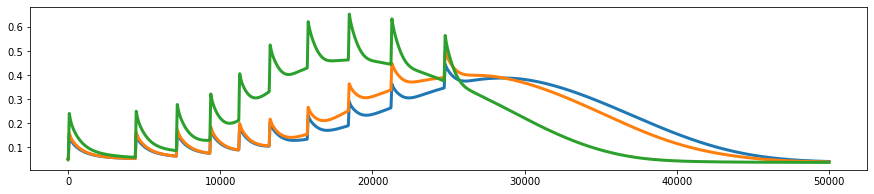

In [13]:
# Plot the average fluorescence of the last 3 results
plt.figure(figsize=(15,3))
plt.plot(np.mean(np.mean(ca1, 1),1), linewidth=3)
plt.plot(np.mean(np.mean(ca2, 1),1), linewidth=3)
plt.plot(np.mean(np.mean(ca3, 1),1), linewidth=3)
plt.show()

# Findings

All if following claims are based on the assumption that there is no electrical coupling in muscle and the "fast pathway" can also induce "slow pathway"

1. If neighborsize = 1, global synchronization cannot be driven;
2. During the first several spikes (before 10s after the stimulation), stimulation cannot be propagated, since the IP3-gated calcium release hasn't been fully driven;
3. After ~10s, stimulation starts spreading at a slow rate;
4. The original PLC-$\delta$ rate v_delta (0.03) is too low to drive a calcium synchronization, after increasing it to 0.06, stimulation starts to spead apparently;
5. The calcium trace is composed with a slow phase caused by the calcium release and fast phases caused by membrane channels